In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
df = pd.read_csv('~/Desktop/Machine learning/DATA/Ames_Housing_Data.csv')

In [7]:
df.head(), df.shape

(         PID  MS SubClass MS Zoning  Lot Frontage  Lot Area Street Alley  \
 0  526301100           20        RL         141.0     31770   Pave   NaN   
 1  526350040           20        RH          80.0     11622   Pave   NaN   
 2  526351010           20        RL          81.0     14267   Pave   NaN   
 3  526353030           20        RL          93.0     11160   Pave   NaN   
 4  527105010           60        RL          74.0     13830   Pave   NaN   
 
   Lot Shape Land Contour Utilities  ... Pool Area Pool QC  Fence Misc Feature  \
 0       IR1          Lvl    AllPub  ...         0     NaN    NaN          NaN   
 1       Reg          Lvl    AllPub  ...         0     NaN  MnPrv          NaN   
 2       IR1          Lvl    AllPub  ...         0     NaN    NaN         Gar2   
 3       Reg          Lvl    AllPub  ...         0     NaN    NaN          NaN   
 4       IR1          Lvl    AllPub  ...         0     NaN  MnPrv          NaN   
 
   Misc Val Mo Sold Yr Sold  Sale Type  Sa

In [9]:
#Outliers identification-------------------------------------------------------------------------------------------------------------
df.corr(numeric_only=True)['SalePrice'].sort_values(ascending=False).head(10)

SalePrice         1.000000
Overall Qual      0.799262
Gr Liv Area       0.706780
Garage Cars       0.647877
Garage Area       0.640401
Total Bsmt SF     0.632280
1st Flr SF        0.621676
Year Built        0.558426
Full Bath         0.545604
Year Remod/Add    0.532974
Name: SalePrice, dtype: float64

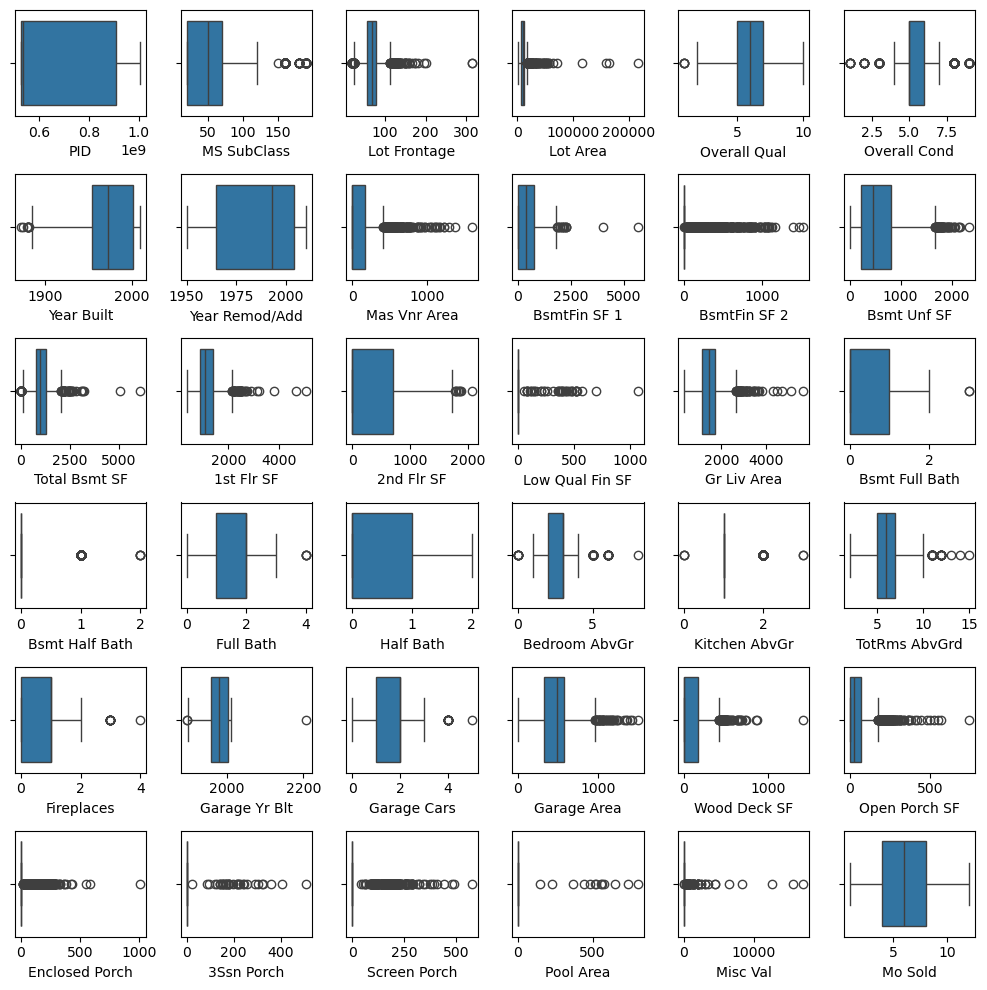

In [11]:
fig, ax = plt.subplots(6, 6, figsize=(10,10))
col_names = df.select_dtypes(include='number').columns
ind = 0
for i in range(6):
    for j in range(6):  
        sns.boxplot(data=df, x=col_names[ind], ax=ax[i][j])
        ind += 1
plt.tight_layout()

In [12]:
df.select_dtypes(include='number').columns

Index(['PID', 'MS SubClass', 'Lot Frontage', 'Lot Area', 'Overall Qual',
       'Overall Cond', 'Year Built', 'Year Remod/Add', 'Mas Vnr Area',
       'BsmtFin SF 1', 'BsmtFin SF 2', 'Bsmt Unf SF', 'Total Bsmt SF',
       '1st Flr SF', '2nd Flr SF', 'Low Qual Fin SF', 'Gr Liv Area',
       'Bsmt Full Bath', 'Bsmt Half Bath', 'Full Bath', 'Half Bath',
       'Bedroom AbvGr', 'Kitchen AbvGr', 'TotRms AbvGrd', 'Fireplaces',
       'Garage Yr Blt', 'Garage Cars', 'Garage Area', 'Wood Deck SF',
       'Open Porch SF', 'Enclosed Porch', '3Ssn Porch', 'Screen Porch',
       'Pool Area', 'Misc Val', 'Mo Sold', 'Yr Sold', 'SalePrice'],
      dtype='object')

In [13]:
outliers = []

Possible outliers: 
            PID  MS SubClass MS Zoning
1182  533350090           60        RL
1498  908154235           60        RL
2180  908154195           20        RL
2181  908154205           60        RL
2737  905427030           75        RL


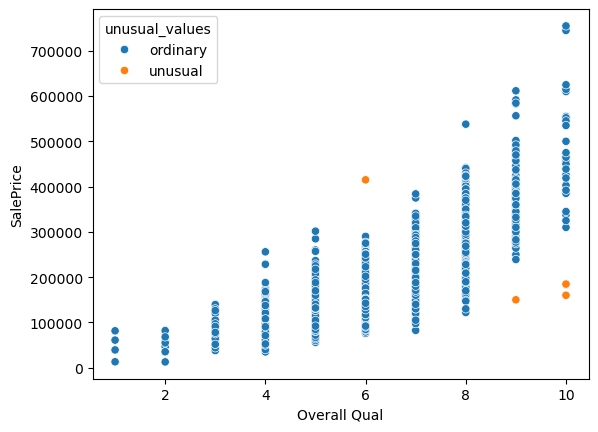

In [17]:
unusual_condition = ((df['Overall Qual'] == 6)&(df['SalePrice']>3*10**5) | 
                    (df['Overall Qual']==10)&(df['SalePrice']<2*10**5) | 
                    (df['Overall Qual']==9)&(df['SalePrice']<2*10**5))
df['unusual_values'] = np.where(unusual_condition, 'unusual', 'ordinary')
sns.scatterplot(data=df, x='Overall Qual',  y='SalePrice', hue='unusual_values')
print('Possible outliers: ', df[df['unusual_values']=='unusual'].iloc[:,:3], sep='\n')
outliers.extend(df[df['unusual_values']=='unusual'].iloc[:,:3]['PID'])

Possible outliers: 
            PID  MS SubClass MS Zoning
1498  908154235           60        RL
2180  908154195           20        RL
2181  908154205           60        RL


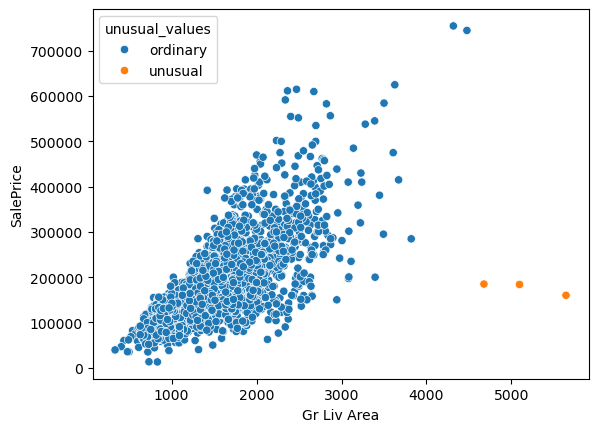

In [19]:
unusual_condition = (df['Gr Liv Area'] > 4000)&(df['SalePrice']<2*10**5)
df['unusual_values'] = np.where(unusual_condition, 'unusual', 'ordinary')
sns.scatterplot(data=df, x='Gr Liv Area',  y='SalePrice', hue='unusual_values')
print('Possible outliers: ', df[df['unusual_values']=='unusual'].iloc[:,:3], sep='\n')
outliers.extend(df[df['unusual_values']=='unusual'].iloc[:,:3]['PID'])

Possible outliers: 
           PID  MS SubClass MS Zoning
746  903236040           30        RM


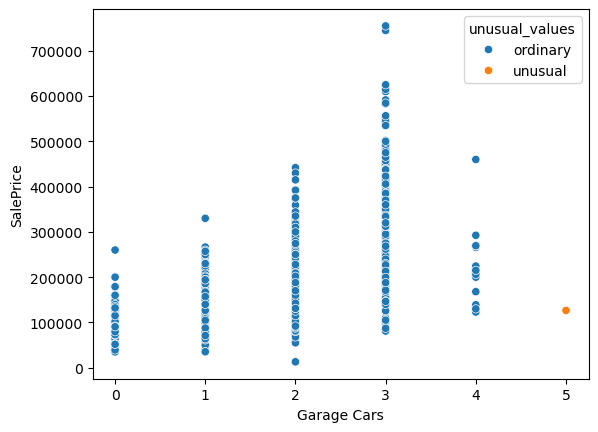

In [21]:
unusual_condition = (df['Garage Cars'] == 5)
df['unusual_values'] = np.where(unusual_condition, 'unusual', 'ordinary')
sns.scatterplot(data=df, x='Garage Cars',  y='SalePrice', hue='unusual_values')
print('Possible outliers: ', df[df['unusual_values']=='unusual'].iloc[:,:3], sep='\n')
outliers.extend(df[df['unusual_values']=='unusual'].iloc[:,:3]['PID'])

Possible outliers: 
            PID  MS SubClass MS Zoning
1760  528320050           60        RL
1767  528351010           60        RL


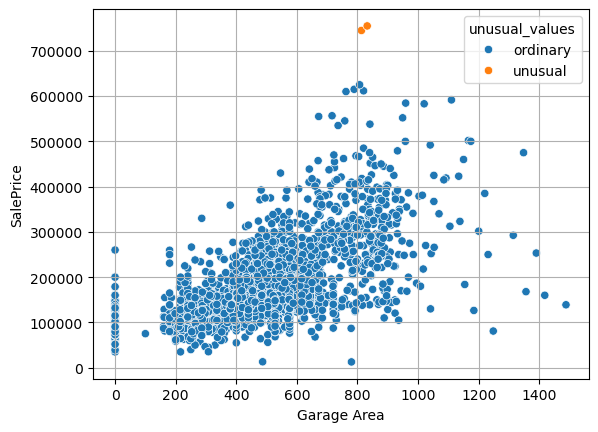

In [23]:
unusual_condition = (df['Garage Area'] > 800) & (df['SalePrice'] > 7*10**5)
df['unusual_values'] = np.where(unusual_condition, 'unusual', 'ordinary')
sns.scatterplot(data=df, x='Garage Area',  y='SalePrice', hue='unusual_values')
print('Possible outliers: ', df[df['unusual_values']=='unusual'].iloc[:,:3], sep='\n')
plt.grid()
outliers.extend(df[df['unusual_values']=='unusual'].iloc[:,:3]['PID'])

In [475]:
s = set(outliers)
df_1 = df[~df['PID'].isin(s)]

In [477]:
#MISSING VALUES (with the use Amen_housing.txt) ------------------------------------------------------------------------------------
#look at full picture (all columns with NA values)
#working with rows (less than 1% NA)
#working with columns (more then 1% NA)

In [479]:
#Function for showing percent of missing data
def percent_missing_data(df):
    miss = df.isnull().sum().sort_values(ascending=False)
    miss = miss[miss > 0]
    miss = np.round(miss / len(df) * 100, 4)
    return miss

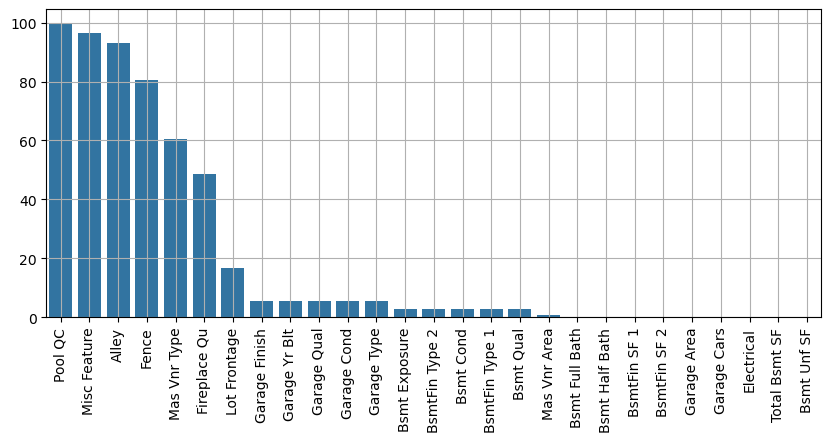

In [481]:
#Missing values before cleaning
plt.figure(figsize=(10,4))
sns.barplot(data=percent_missing_data(df_1))
plt.xticks(rotation=90)
plt.grid();

In [483]:
#Drop all rows which is located in less than 1 percent columns
miss_1 = percent_missing_data(df_1)
cols_less_than_1_percent = miss_1[miss_1<1].index
df_2 = df_1.dropna(subset=cols_less_than_1_percent)

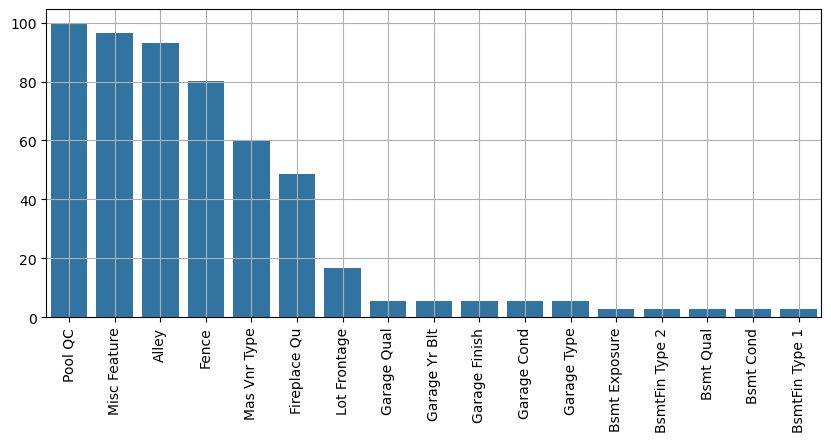

In [485]:
plt.figure(figsize=(10,4))
sns.barplot(data=percent_missing_data(df_2))
plt.xticks(rotation=90)
plt.grid();

In [487]:
#Fill some Bsmt with 'None'
df_3 = df_2
subset = percent_missing_data(df_2).index[-5:]
for i in subset:
    df_3[i] = df_3[i].fillna('None')

/var/folders/mk/x_yh2lvx1cj8hgw7nk4n0j680000gn/T/ipykernel_7962/3670189974.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_3[i] = df_3[i].fillna('None')


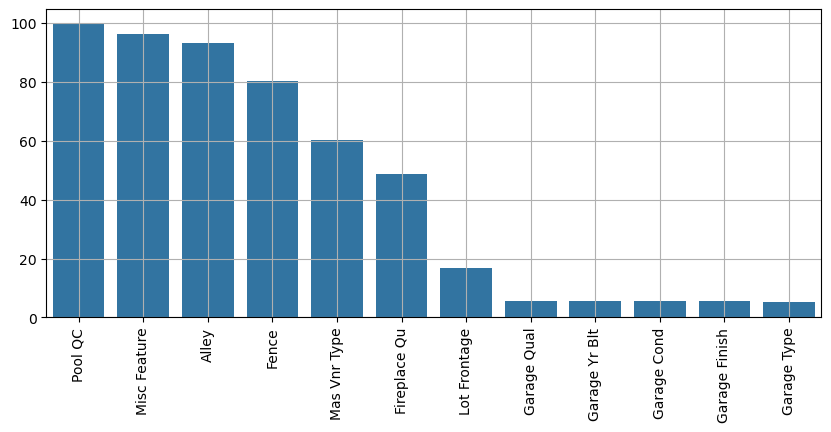

In [489]:
plt.figure(figsize=(10,4))
sns.barplot(data=percent_missing_data(df_3))
plt.xticks(rotation=90)
plt.grid();

In [491]:
#Filling Garage with 'None'
df_4 = df_3
subset = ['Garage Qual', 'Garage Cond', 'Garage Finish', 'Garage Type']
for i in subset:
    df_4[i] = df_4[i].fillna('None')

/var/folders/mk/x_yh2lvx1cj8hgw7nk4n0j680000gn/T/ipykernel_7962/3794563013.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_4[i] = df_4[i].fillna('None')


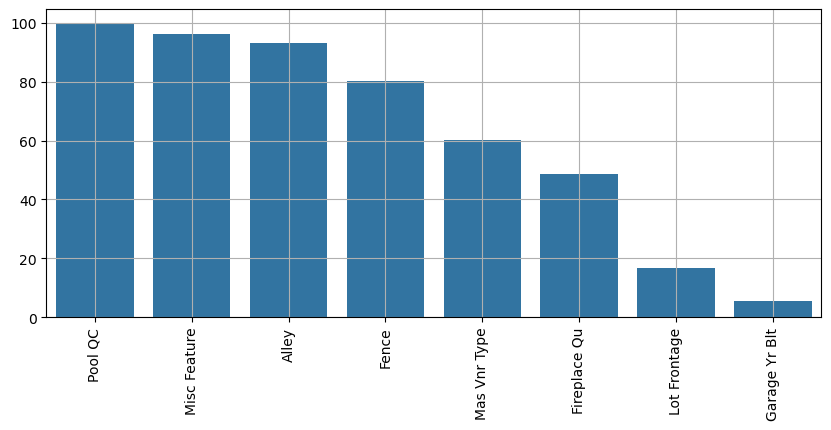

In [493]:
plt.figure(figsize=(10,4))
sns.barplot(data=percent_missing_data(df_4))
plt.xticks(rotation=90)
plt.grid();

In [495]:
#Pool QC - fill with 'None', Misc Feature with 'None', Alley - 'None', Fence - 'None', Mas Vnr Type - 'None', FireplaceQU - 'None'
df_5 = df_4
columns_to_exclude = ['Lot Frontage', 'Garage Yr Blt']
subset = percent_missing_data(df_5).index
for i in subset:
    if i not in columns_to_exclude:
        df_5[i] = df_5[i].fillna('None')

/var/folders/mk/x_yh2lvx1cj8hgw7nk4n0j680000gn/T/ipykernel_7962/495422144.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_5[i] = df_5[i].fillna('None')


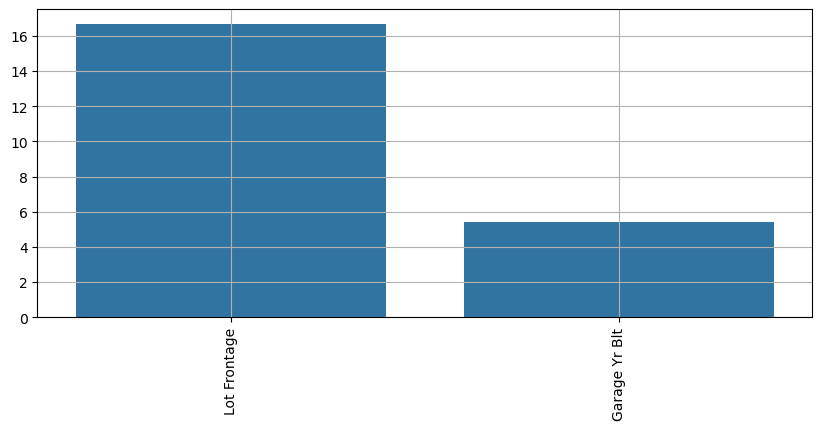

In [497]:
plt.figure(figsize=(10,4))
sns.barplot(data=percent_missing_data(df_5))
plt.xticks(rotation=90)
plt.grid();

In [499]:
#Handling with numeric NA - Garage Yr Blt
df_5['Garage Yr Blt'] = df_5['Garage Yr Blt'].fillna(0)

/var/folders/mk/x_yh2lvx1cj8hgw7nk4n0j680000gn/T/ipykernel_7962/2962313907.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_5['Garage Yr Blt'] = df_5['Garage Yr Blt'].fillna(0)


In [501]:
#Handling with numeric NA - Lot Frontage
#Using avg Lot Frontage in specific neibourhood change the NA with it
Neighbours_Lot = df_5.groupby('Neighborhood').agg(avg_dist=('Lot Frontage','mean'))
df_6 = df_5.merge(Neighbours_Lot, on='Neighborhood', how='inner')
df_6['is_Lot_na'] = df_6['Lot Frontage'].isnull()
# Conditional logic based on multiple columns
df_6['Lot Frontage'] = np.where(
    df_6['is_Lot_na'] == True, 
    df_6['avg_dist'],
    df_6['Lot Frontage']
)
df_6 = df_6.dropna(subset=['Lot Frontage'])

In [518]:
#Working with Dummy variables ------------------------------------------------------------------------------------------------
df_6['MS SubClass'] = df_6['MS SubClass'].astype('str')
final_df = pd.get_dummies(df_6, drop_first=True)
final_df = final_df.drop('PID', axis=1)

In [522]:
final_df.to_csv('final_df.csv', index=False)